# Image Classifiaction

1. **Data Preprocessing and Augmentation:**
   - Data preprocessing is a crucial step in machine learning. In this case, images are preprocessed to make them suitable for training a deep learning model.
   - Rescaling is used to normalize pixel values, typically scaling them to a range between 0 and 1.
   - Augmentation techniques like rotation, shifting, shearing, zooming, and flipping are applied to artificially increase the diversity of the training dataset. This helps the model generalize better to real-world data.

2. **Loading and Preprocessing Training Images:**
   - To train a deep learning model, you need a dataset of labeled images. The `ImageDataGenerator` is used to load and preprocess these images.
   - The directory structure should be organized with subdirectories for each class of images.
   - `flow_from_directory` method loads images from the specified directory and performs preprocessing.
   - `target_size` ensures all images are resized to a consistent size.
   - `batch_size` determines how many images are processed in each training iteration.
   - `class_mode` specifies the type of classification (e.g., binary or categorical).
   - `shuffle` ensures that the order of images is randomized during training to prevent the model from learning the order of the dataset.

3. **Creating MobileNetV2 Base Model:**
   - MobileNetV2 is a pre-trained deep learning model that is used as a feature extractor. It's a type of convolutional neural network (CNN).
   - The base model is used to capture the high-level features of the input images. It has been trained on a large dataset (ImageNet) and can recognize a wide range of features.
   - `include_top=False` indicates that we're not using the final classification layer of MobileNetV2. Instead, we'll add our own custom classification layers.
   - `weights='imagenet'` specifies that we want to use the pre-trained weights from the ImageNet dataset.

4. **Adding Custom Classification Layers:**
   - After using MobileNetV2 as a feature extractor, we add our own custom layers for classification.
   - Global average pooling is used to reduce the spatial dimensions of the feature maps. This simplifies the model and reduces the number of parameters.
   - Dense layers with ReLU activation are added to learn complex patterns in the feature maps.
   - The final dense layer has as many units as there are classes in the classification task and uses a softmax activation to make class predictions.

5. **Creating the Final Classification Model:**
   - The final model is created by combining the base MobileNetV2 model with the custom classification layers.
   - This model can take images as input and output class predictions.

6. **Compiling the Model:**
   - To train the model, it needs to be compiled with an optimizer, a loss function, and evaluation metrics.
   - 'Adam' is a popular optimizer, and 'categorical_crossentropy' is a common loss function for multi-class classification.
   - The 'accuracy' metric is used to evaluate how well the model is performing during training.

7. **ModelCheckpoint Callback:**
   - The `ModelCheckpoint` callback is used to save the best model during training.
   - It monitors a specific metric, in this case, 'accuracy,' and saves the model when this metric is maximized.

8. **Training the Model:**
   - The model is trained using the training dataset and the specified configuration (e.g., number of epochs).
   - During training, the model's weights are updated to minimize the loss function, and its performance is evaluated using the validation data.

9. **Printing Training Results:**
   - After training is complete, you can print a message to confirm the training settings used (e.g., batch size and number of epochs).

### References
[https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c](https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c) <br>

[https://blog.roboflow.com/how-to-train-mobilenetv2-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-mobilenetv2-on-a-custom-dataset/) <bt>

[https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/](https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/) <br>

[https://paperswithcode.com/method/mobilenetv2](https://paperswithcode.com/method/mobilenetv2) <br>

[https://www.youtube.com/watch?v=jztwpsIzEGc](https://www.youtube.com/watch?v=jztwpsIzEGc) <br>

[https://www.kaggle.com/code/mgiraygokirmak/mobilenetv2](https://www.kaggle.com/code/mgiraygokirmak/mobilenetv2) <br>


## Data Store Initiate

In [9]:
import os
import matplotlib as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# ? Data directory
data_dir = '../data/dataset/actual/'
image_size = (224, 224)
custom_class_labels = os.listdir(data_dir)


# ? Establish path for training data
train_dir = os.path.join(data_dir, 'train')

# ? Creates directory if it doesn't exist
os.makedirs(train_dir, exist_ok=True)


# Data Processing

In [12]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# ? Program constants
data_dir = '../data/dataset/actual/train'
image_size = (224, 224)
custom_class_labels = os.listdir(data_dir)

# ? Batch Size & Epoch
batch_sizes = [32]     # ? Batch size customization
epochs_list = [5]       # ? Epoch size customization

# ? Result variables
best_accuracy = 0.0  
best_batch_size = 0
best_epochs = 0

for best_batch_size in batch_sizes:
    for best_epochs in epochs_list:
        # ? Process the image
        datagen = ImageDataGenerator(
            rescale=1.0 / 255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        # ? Use the proccessed image for training
        train_data = datagen.flow_from_directory(
            train_dir,
            target_size=image_size,
            batch_size=best_batch_size,
            class_mode='categorical',
            classes=custom_class_labels,
            shuffle=True
        )

        # ? Create MobileNetV2 model
        base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3), include_top=False, weights='imagenet')

        # ? Adds a custom classification layers on the base model
        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(len(custom_class_labels), activation='softmax')(x)

        # ? Final model
        model = Model(inputs=base_model.input, outputs=predictions)

        # ? Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # ? Creates a checkpoint to the best model based on training accuracy
        model_checkpoint = ModelCheckpoint(f'best_model_{best_batch_size}bs_{best_epochs}ep.h5', save_best_only=True, monitor='accuracy', mode='max')

        # ? Train the model 
        history = model.fit(train_data, epochs=best_epochs, callbacks=[model_checkpoint])

        # ? Keep track of the best model
        if history.history['accuracy'][-1] > best_accuracy:
            best_accuracy = history.history['accuracy'][-1]
            best_batch_size = best_batch_size
            best_epochs = best_epochs

# ? Print the Result
print(f"Best Batch Size: {best_batch_size}")
print(f"Best Number of Epochs: {best_epochs}")


Found 708 images belonging to 16 classes.
Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 2.8348 - accuracy: 0.1186

c:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 107s 4s/step - loss: 2.8348 - accuracy: 0.1186
Epoch 2/5
23/23 [==============================] - 93s 4s/step - loss: 2.5264 - accuracy: 0.2020
Epoch 3/5
23/23 [==============================] - 93s 4s/step - loss: 2.3249 - accuracy: 0.2754
Epoch 4/5
23/23 [==============================] - 95s 4s/step - loss: 2.1932 - accuracy: 0.3093
Epoch 5/5
23/23 [==============================] - 93s 4s/step - loss: 2.0914 - accuracy: 0.3277
Best Batch Size: 32
Best Number of Epochs: 5


# Overall Best Model

In [13]:
# ? Print the result
print(f"Best Model: Batch Size - {best_batch_size}, Epochs - {best_epochs}, Acc - {best_accuracy}")

Best Model: Batch Size - 32, Epochs - 5, Acc - 0.32768362760543823


# Train Best Model

In [14]:
# ? Process the image
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ? Use the proccessed image for training
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=best_batch_size,
    class_mode='categorical',
    classes=custom_class_labels,
    shuffle=True
)

# ? Create MobileNetV2 model
base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3), include_top=False, weights='imagenet')

# ? Adds a custom classification layers on the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(custom_class_labels), activation='softmax')(x)

# ? Create the final classification model
best_model = Model(inputs=base_model.input, outputs=predictions)

# ? Compile the best model
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ? Train the best model
history = best_model.fit(train_data, epochs=best_epochs)

# ? Print the training results
print(f"Training completed with {best_batch_size} batch size and {best_epochs} epochs.")

Found 708 images belonging to 16 classes.
Epoch 1/5
23/23 [==============================] - 108s 4s/step - loss: 2.8409 - accuracy: 0.0975
Epoch 2/5
23/23 [==============================] - 91s 4s/step - loss: 2.5400 - accuracy: 0.1992
Epoch 3/5
23/23 [==============================] - 90s 4s/step - loss: 2.3594 - accuracy: 0.2486
Epoch 4/5
23/23 [==============================] - 97s 4s/step - loss: 2.2535 - accuracy: 0.2994
Epoch 5/5
23/23 [==============================] - 93s 4s/step - loss: 2.1937 - accuracy: 0.2966
Training completed with 32 batch size and 5 epochs.


# Summary of Best Model

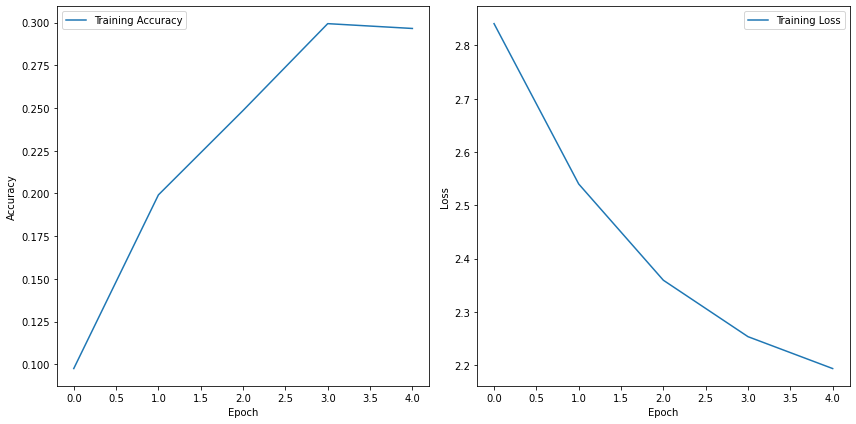

In [15]:
# ? Plot a graph for training accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Save Model

In [16]:

# ? Model name template
model_name = "custom_sentiment_model"

# ? Save the model with the help of model name template
model.save(f'../data/model/Ads_Senti_{best_batch_size}bs_{best_epochs}ep.keras')


# Testing

In [33]:
from tensorflow.keras.models import load_model

# ? Load the saved model
model = load_model('../data/model/Ads_Senti_128bs_35ep.keras')


In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

data_dir = '../data/dataset/actual/train'

# ? Define the label with which you want to classify
custom_class_labels = os.listdir(data_dir)

# ? Load and process the image
img_path = '../data/dataset/sample/validation/not effective/image_35.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# ? Make prediction using the model
predictions = model.predict(img_array)

# ? Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class_label = custom_class_labels[predicted_class_index]

print(f"prediciton convo matrix {predictions}")
print(f"Predicted class label: {predicted_class_label}")


1/1 [==============================] - 3s 3s/step
prediciton convo matrix [[7.4388504e-07 6.7024789e-06 9.5209175e-01 1.8992198e-14 8.1367768e-24
  4.7900826e-02]]
Predicted class label: alarmed
